<a href="https://colab.research.google.com/github/jmatrone/CEE609_Research_Project/blob/main/Torrey_Pines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install geopandas
!pip install earthpy
!pip install rtree
!pip install pygeos
!pip install mapclassify>=2.4.0
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.4 MB/s eta 0:00:00


In [6]:
Tpines = gpd.read_file('2006 Census clip.shp')

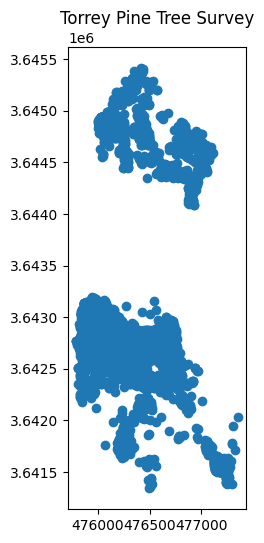

In [7]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
Tpines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Torrey Pine Tree Survey")
plt.show()

In [8]:
Tpines.head()

,Age,DBH__cm_,Height_cm_,Whorls,Trunks,Cones,Comment,SQRT_DBH,geometry
0,Sapling,0.0,110.0,7,1,No,None,0.0,POINT (476991.244 3644438.208)
1,Adult,2.1,190.0,12,1,Yes,+Cones,1.4,POINT (476992.026 3644436.86)
2,Sub-adult,1.9,225.0,14,1,No,None,1.4,POINT (476996.136 3644433.935)
3,Adult,5.4,0.0,12,1,Yes,None,2.3,POINT (476998.078 3644441.184)
4,Adult,27.3,0.0,0,1,Yes,None,5.2,POINT (477004.418 3644430.12)


In [9]:
Tpines2018 = gpd.read_file('Tierra census_clip.shp')

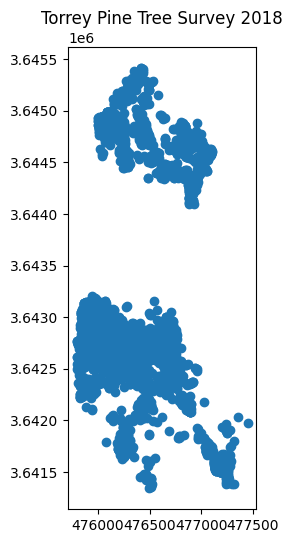

In [10]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
Tpines2018.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Torrey Pine Tree Survey 2018")
plt.show()

In [11]:
Tpines2018.head()

,OBJECTID_1,Age,DBH__cm_,Height_cm_,Whorls,Trunks,Cones,Comment,Health,GPS_Used,Azimuth,Distance,Date,DBH,rDBH,geometry
0,1,Adult,64.3,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476614.461 3644430.582 0)
1,2,Adult,61.6,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476610.757 3644438.886 0)
2,3,Adult,33.0,0.0,0,1,Yes,Prostrate only able to measure 1 upright trunk,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476598.128 3644423.615 0)
3,4,Adult,64.8,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476614.896 3644415.567 0)
4,5,Adult,56.0,0.0,0,2,Yes,23.0,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476612.47 3644423.313 0)


In [12]:
print("Tpines columns:", Tpines.columns)
print("Tpines2018 columns:", Tpines2018.columns)


Tpines columns: Index(['Age', 'DBH__cm_', 'Height_cm_', 'Whorls', 'Trunks', 'Cones', 'Comment',
       'SQRT_DBH', 'geometry'],
      dtype='object')
Tpines2018 columns: Index(['OBJECTID_1', 'Age', 'DBH__cm_', 'Height_cm_', 'Whorls', 'Trunks',
       'Cones', 'Comment', 'Health', 'GPS_Used', 'Azimuth', 'Distance', 'Date',
       'DBH', 'rDBH', 'geometry'],
      dtype='object')


In [13]:
# Calculate the total number of trees in each dataset
total_trees_2006 = len(Tpines)
total_trees_2018 = len(Tpines2018)

print(total_trees_2006)
print(total_trees_2018)
#2006-4672    2018-4398

# Calculate the difference in tree population
population_difference = total_trees_2018 - total_trees_2006

4672
4398


In [14]:
# Determine if there is an increase or decrease
if population_difference > 0:
    result = f"There is an increase of {population_difference} trees in 2018 compared to 2006."
elif population_difference < 0:
    result = f"There is a decrease of {abs(population_difference)} trees in 2018 compared to 2006."
else:
    result = "The tree population remained the same in 2018 compared to 2006."

print(result)
#There is a decrease of 274 trees in 2018 compared to 2006.

There is a decrease of 274 trees in 2018 compared to 2006.


In [15]:
!pip install rioxarray
import os
import rioxarray as rxr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.0 MB/s eta 0:00:00


In [16]:
pip install pyPRISMClimate


In [31]:
import pandas as pd

# Load the weather data into a DataFrame, skipping the first 10 rows
weather_data = pd.read_csv('/content/drive/MyDrive/PRISM_research_project.csv', skiprows=10)

# Display the first few rows of the DataFrame
print(weather_data.head())



      Date  ppt (inches)  tmean (degrees F)
0  2006-01          1.86               52.3
1  2006-02          1.66               54.6
2  2006-03          5.67               46.7
3  2006-04          3.11               53.0
4  2006-05          0.50               64.0


In [32]:
print(weather_data.columns)


Index(['Date', 'ppt (inches)', 'tmean (degrees F)'], dtype='object')


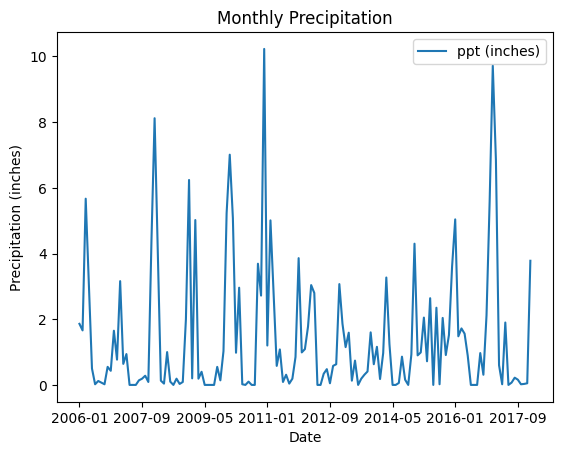

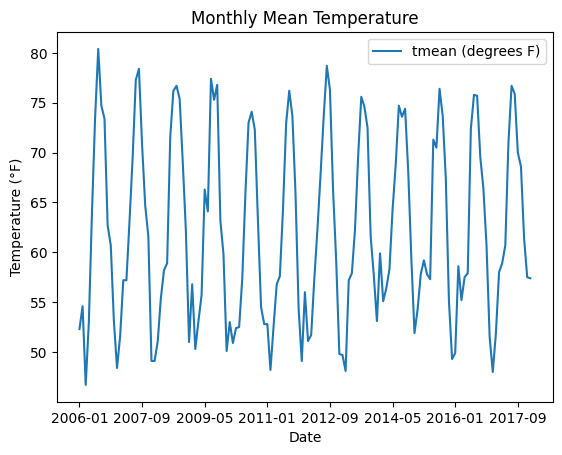

In [33]:
# Plot precipitation over time
weather_data.plot(x='Date', y='ppt (inches)', kind='line')
plt.title('Monthly Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

# Plot temperature over time
weather_data.plot(x='Date', y='tmean (degrees F)', kind='line')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

